<a href="https://colab.research.google.com/github/alinapradhan/FDS-Project-/blob/main/FDS24MBD023ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### NUCLEAR DATASET EDA
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
nukes = pd.read_csv("nuclear_explosions.csv")
nukes.head()

,WEAPON SOURCE COUNTRY,WEAPON DEPLOYMENT LOCATION,Data.Source,Location.Cordinates.Latitude,Location.Cordinates.Longitude,Data.Magnitude.Body,Data.Magnitude.Surface,Location.Cordinates.Depth,Data.Yeild.Lower,Data.Yeild.Upper,Data.Purpose,Data.Name,Data.Type,Date.Day,Date.Month,Date.Year
0,USA,Alamogordo,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,Wr,Trinity,Tower,16,7,1945
1,USA,Hiroshima,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,Combat,Littleboy,Airdrop,5,8,1945
2,USA,Nagasaki,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,Combat,Fatman,Airdrop,9,8,1945
3,USA,Bikini,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,We,Able,Airdrop,30,6,1946
4,USA,Bikini,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,We,Baker,Uw,24,7,1946


In [3]:
nukes.columns

Index(['WEAPON SOURCE COUNTRY', 'WEAPON DEPLOYMENT LOCATION', 'Data.Source',
       'Location.Cordinates.Latitude', 'Location.Cordinates.Longitude',
       'Data.Magnitude.Body', 'Data.Magnitude.Surface',
       'Location.Cordinates.Depth', 'Data.Yeild.Lower', 'Data.Yeild.Upper',
       'Data.Purpose', 'Data.Name', 'Data.Type', 'Date.Day', 'Date.Month',
       'Date.Year'],
      dtype='object')

In [4]:
nukes.rename(columns = {"WEAPON SOURCE COUNTRY":"Source Country",
                        "WEAPON DEPLOYMENT LOCATION":"Deployment Location",
                       "Location.Cordinates.Latitude": "Latitude",
                       "Location.Cordinates.Longitude":"Longitude",
                       "Location.Cordinates.Depth":"Depth",
                       "Data.Source":"Source",
                       "Data.Magnitude.Body":"Body Wave Magnitude",
                       "Data.Magnitude.Surface":"Surface Wave Magnitude",
                       "Data.Yeild.Lower":"Explosion Yield L",
                       "Data.Yeild.Upper":"Explosion Yield U",
                       "Data.Purpose":"Detonation Reason",
                       "Data.Name":"Name",
                       "Data.Type":"Detonation Method",
                       "Date.Day":"Day",
                       "Date.Month":"Month",
                       "Date.Year":"Year"}, inplace=True)
nukes.columns

Index(['Source Country', 'Deployment Location', 'Source', 'Latitude',
       'Longitude', 'Body Wave Magnitude', 'Surface Wave Magnitude', 'Depth',
       'Explosion Yield L', 'Explosion Yield U', 'Detonation Reason', 'Name',
       'Detonation Method', 'Day', 'Month', 'Year'],
      dtype='object')

In [5]:
nukes.isna().sum()

,0
Source Country,0
Deployment Location,0
Source,0
Latitude,0
Longitude,0
Body Wave Magnitude,0
Surface Wave Magnitude,0
Depth,0
Explosion Yield L,0
Explosion Yield U,0


In [6]:
print("Missing values by features:")
for col in nukes.columns:
    num = 0
    num = num + len(nukes[nukes[col] == "Nan"])
    num = num + len(nukes[nukes[col] == "Na"])
    num = num + len(nukes[nukes[col] == "Null"])
    print(f"{col}: {num} missing values\n")

Missing values by features:
Source Country: 0 missing values

Deployment Location: 0 missing values

Source: 0 missing values

Latitude: 0 missing values

Longitude: 0 missing values

Body Wave Magnitude: 0 missing values

Surface Wave Magnitude: 0 missing values

Depth: 0 missing values

Explosion Yield L: 0 missing values

Explosion Yield U: 0 missing values

Detonation Reason: 1 missing values

Name: 663 missing values

Detonation Method: 0 missing values

Day: 0 missing values

Month: 0 missing values

Year: 0 missing values



In [7]:
nukes["Name"] = nukes["Name"].apply(lambda x: "Unnamed" if x == "Nan" or x == "Null" or x == "Na" else x)

In [8]:
duplicates = nukes[nukes.duplicated()]

print(duplicates)

print("\n\nNumber of Rows Duplicated", duplicates.shape)

     Source Country Deployment Location Source  Latitude  Longitude  \
352            USSR            Mtr Russ    MTM      48.0       46.0   
1599           USSR         Semi Kazakh    MTM      50.0       78.0   
1789           USSR           Perm Russ    NOA      61.0       58.0   

      Body Wave Magnitude  Surface Wave Magnitude  Depth  Explosion Yield L  \
352                   0.0                     0.0    0.0              1.200   
1599                  0.0                     0.0    0.0              0.001   
1789                  4.5                     0.0    0.0              3.200   

      Explosion Yield U Detonation Reason     Name Detonation Method  Day  \
352                 1.2                We  Unnamed             Space   27   
1599               20.0                Wr  Unnamed            Tunnel    5   
1789                3.2               Pne    Geliy             Shaft   28   

      Month  Year  
352      10  1961  
1599     12  1980  
1789      8  1984  


Number 

In [9]:
nukes = nukes.drop(nukes.index[[352, 1599, 1789]])

In [10]:
new_duplicates = nukes[nukes.duplicated()]

print("\n\nNumber of Duplicates:", new_duplicates.shape)
print("No more duplicates as the row dimension is a 0.")



Number of Duplicates: (0, 16)
No more duplicates as the row dimension is a 0.


In [11]:
for col in nukes.columns:
    distincts = len(nukes[col].unique())
    print(f"{col}: {distincts} Distinct Values\n")

Source Country: 7 Distinct Values

Deployment Location: 79 Distinct Values

Source: 13 Distinct Values

Latitude: 525 Distinct Values

Longitude: 573 Distinct Values

Body Wave Magnitude: 43 Distinct Values

Surface Wave Magnitude: 26 Distinct Values

Depth: 137 Distinct Values

Explosion Yield L: 308 Distinct Values

Explosion Yield U: 310 Distinct Values

Detonation Reason: 28 Distinct Values

Name: 1306 Distinct Values

Detonation Method: 20 Distinct Values

Day: 31 Distinct Values

Month: 12 Distinct Values

Year: 50 Distinct Values



In [12]:
####EXPLORING THE DATA SET WE BEGIN BY TAKING A LOOK AT THE HEAD AND DESCRIBING THE DATA:
nukes.head()

,Source Country,Deployment Location,Source,Latitude,Longitude,Body Wave Magnitude,Surface Wave Magnitude,Depth,Explosion Yield L,Explosion Yield U,Detonation Reason,Name,Detonation Method,Day,Month,Year
0,USA,Alamogordo,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,Wr,Trinity,Tower,16,7,1945
1,USA,Hiroshima,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,Combat,Littleboy,Airdrop,5,8,1945
2,USA,Nagasaki,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,Combat,Fatman,Airdrop,9,8,1945
3,USA,Bikini,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,We,Able,Airdrop,30,6,1946
4,USA,Bikini,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,We,Baker,Uw,24,7,1946


In [13]:
nukes.describe()

,Latitude,Longitude,Body Wave Magnitude,Surface Wave Magnitude,Depth,Explosion Yield L,Explosion Yield U,Day,Month,Year
count,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000
mean,35.436676,-36.157007,2.146353,0.357220,-0.491550,208.748460,323.894013,16.678904,7.278512,1970.890357
std,23.359139,100.833954,2.626006,1.204375,10.989119,1643.149463,2056.676627,8.796017,3.132288,10.372056
min,-49.500000,-169.320000,0.000000,0.000000,-400.000000,0.000000,0.000000,1.000000,1.000000,1945.000000
25%,37.000000,-116.052500,0.000000,0.000000,0.000000,0.000000,19.000000,9.000000,5.000000,1962.000000
50%,37.100000,-116.000000,0.000000,0.000000,0.000000,0.001000,20.000000,17.000000,8.000000,1970.000000
75%,49.870000,78.000000,5.100000,0.000000,0.000000,20.000000,150.000000,24.500000,10.000000,1979.000000
max,75.100000,179.220000,7.400000,6.000000,1.451000,50000.000000,50000.000000,31.000000,12.000000,1998.000000


In [14]:
print(nukes.dtypes)

Source Country             object
Deployment Location        object
Source                     object
Latitude                  float64
Longitude                 float64
Body Wave Magnitude       float64
Surface Wave Magnitude    float64
Depth                     float64
Explosion Yield L         float64
Explosion Yield U         float64
Detonation Reason          object
Name                       object
Detonation Method          object
Day                         int64
Month                       int64
Year                        int64
dtype: object


In [15]:
# Simple expression
nukes["Explosion Yield Average"] = (nukes["Explosion Yield L"] + nukes["Explosion Yield U"]) / 2

In [16]:
# Head of the average
nukes["Explosion Yield Average"].head()

,Explosion Yield Average
0,21.0
1,15.0
2,21.0
3,21.0
4,21.0


In [17]:
##We could do a check to get the exact number of instances
##where the upper yield is not equal to the lower yield,
##but it is quicker to just take a look at the head and the tail to
##clearly see that some in some entries they are different:
wanted_cols = ["Explosion Yield U", "Explosion Yield L", "Explosion Yield Average"]
unwanted_cols = [col for col in nukes.columns if col not in wanted_cols]
yields = nukes.drop(unwanted_cols, axis="columns")
yields.head()


,Explosion Yield L,Explosion Yield U,Explosion Yield Average
0,21.0,21.0,21.0
1,15.0,15.0,15.0
2,21.0,21.0,21.0
3,21.0,21.0,21.0
4,21.0,21.0,21.0


In [18]:
yields.tail()

,Explosion Yield L,Explosion Yield U,Explosion Yield Average
2041,3.0,12.0,7.5
2042,0.0,20.0,10.0
2043,0.0,1.0,0.5
2044,0.0,35.0,17.5
2045,0.0,18.0,9.0


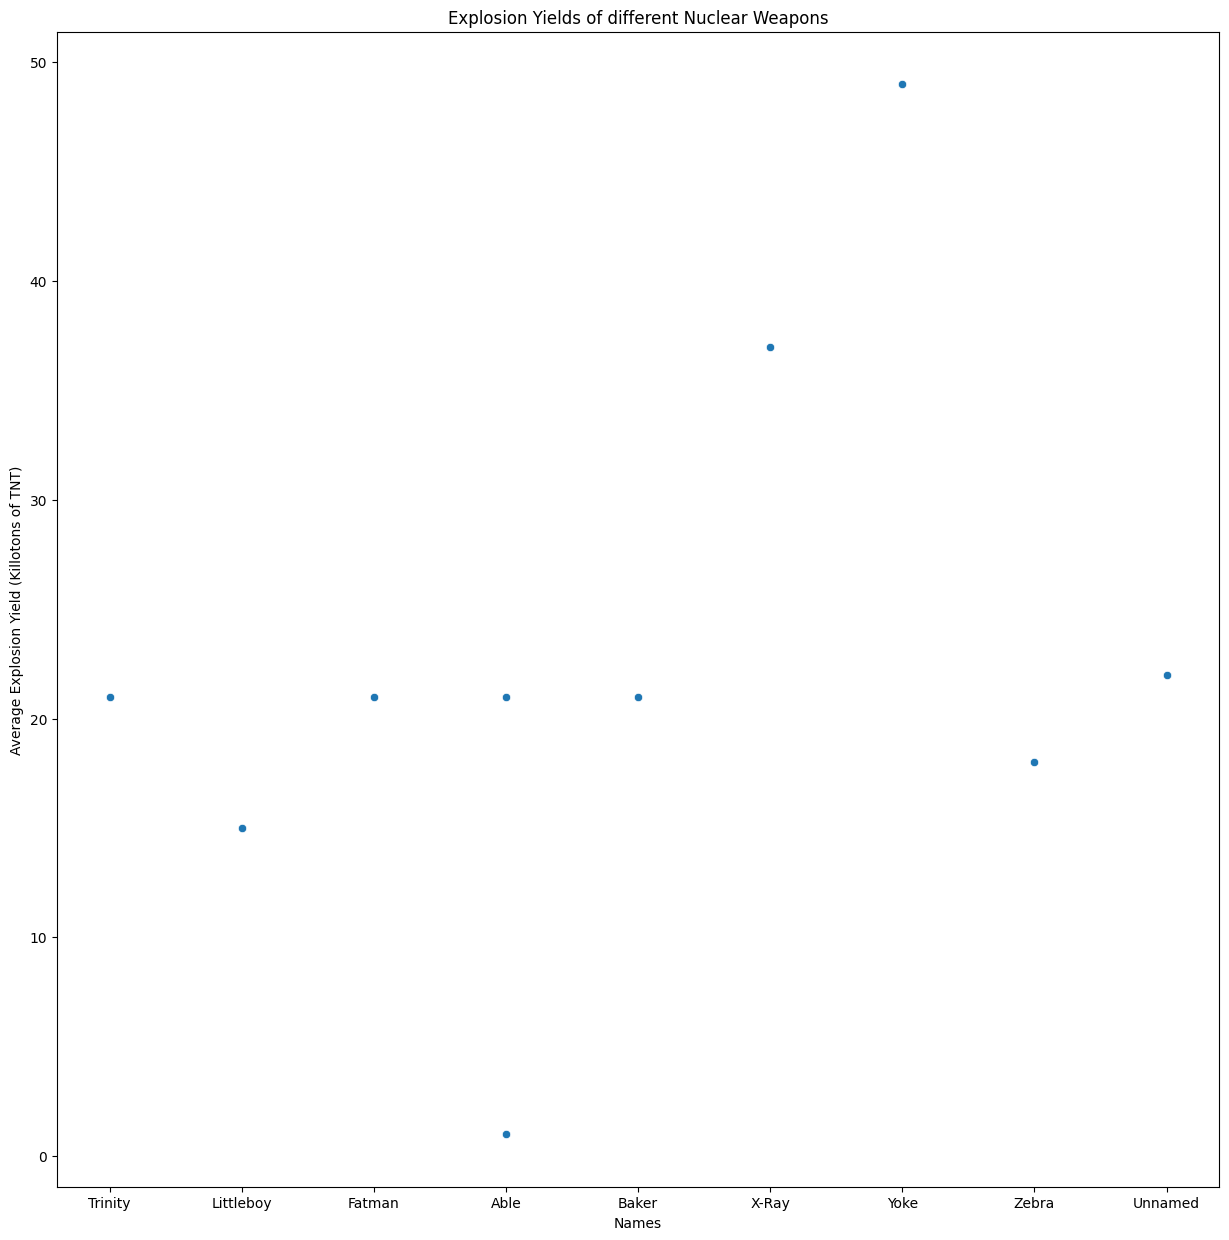

In [19]:
##From the tail entries we can see that they are not always the same,
##hence the average column has some use.


### PLOTTING RELATIONSHIP
plt.figure(figsize=(15,15))
plt.title("Explosion Yields of different Nuclear Weapons")
plt.xlabel("Names")
plt.ylabel("Average Explosion Yield (Killotons of TNT)")
sns.scatterplot(x = nukes["Name"][:10], y = nukes["Explosion Yield Average"][:10])

plt.show()

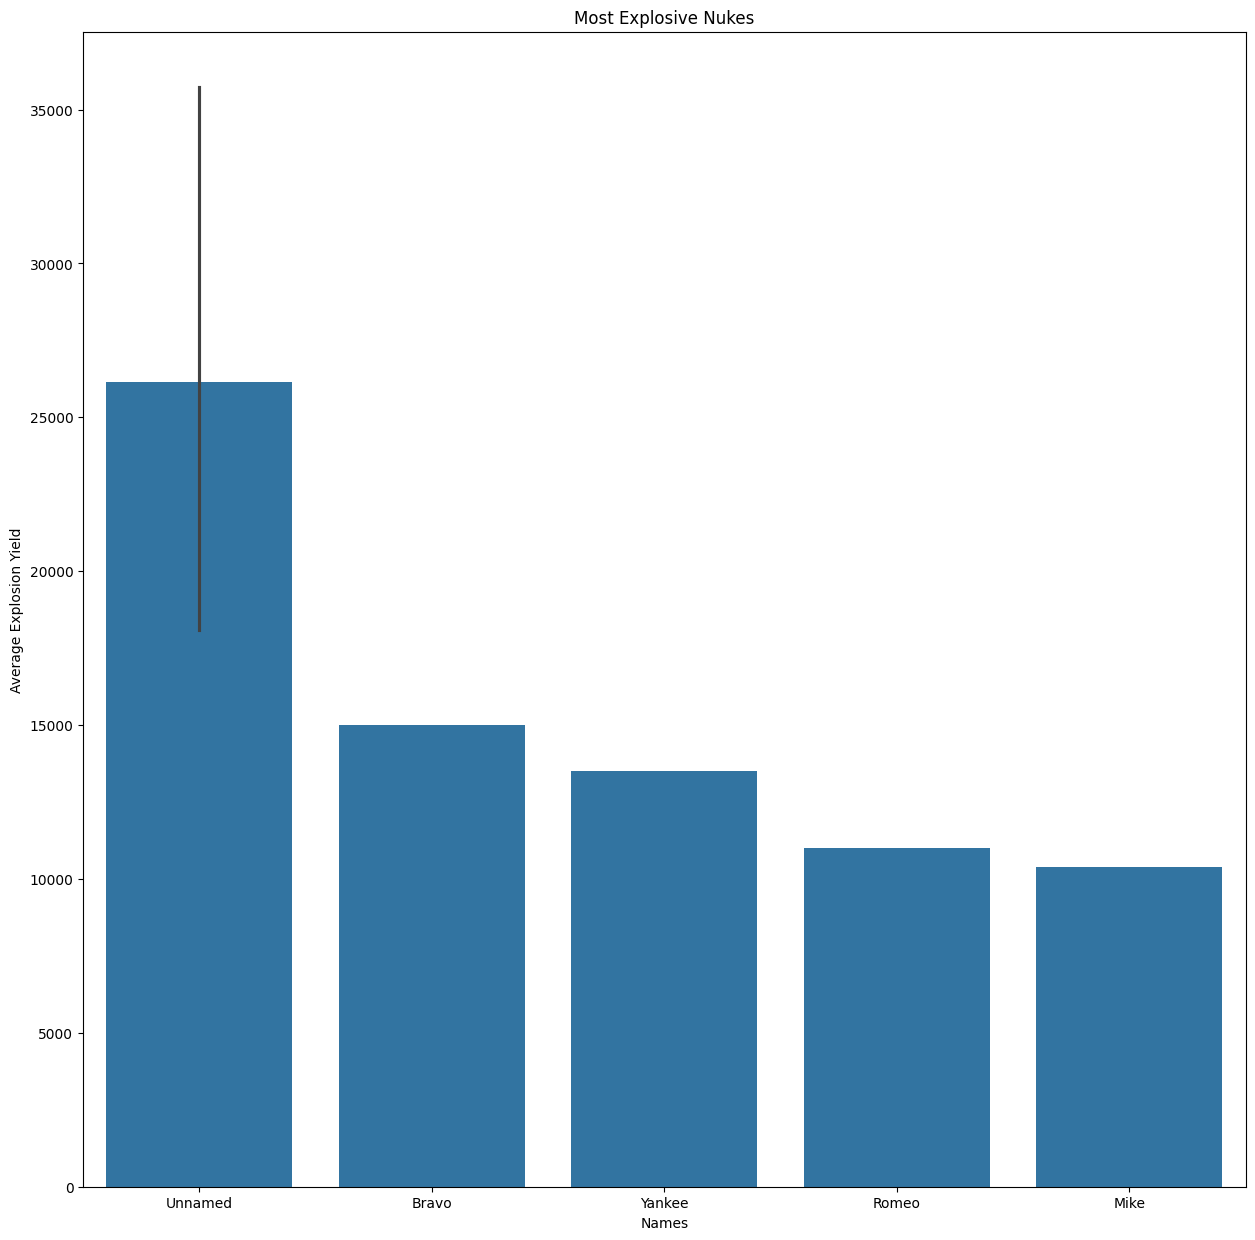

In [20]:
nukes_by_top_explosions = nukes.sort_values(by="Explosion Yield Average", ascending=False)

plt.figure(figsize=(15,15))
sns.barplot(x=nukes_by_top_explosions["Name"][:10], y=nukes_by_top_explosions["Explosion Yield Average"][:10])
plt.title("Most Explosive Nukes")
plt.ylabel("Average Explosion Yield")
plt.xlabel("Names")

plt.show()

In [21]:
nukes_by_least_explosions["Explosion Yield Average"][:50]

NameError: name 'nukes_by_least_explosions' is not defined

In [22]:
#### GEOSPATIAL PLOTS

print(nukes["Source"].unique())

['DOE' 'MTM' 'UGS' 'ISC' 'DIS' 'SPA' 'ZAR' 'WTN' 'HFS' 'MTU' 'NRD' 'BKY'
 'NOA']


In [23]:
countries = {"DOE":"United States", "MTM":"Russia", "ISC":"UK", "UGS":"United States", "DIS":"Netherlands", "SPA":"France",
            "ZAR":"Sweden", "WTN":"New Zealand", "HFS":"Sweden", "MTU":"United States", "NRD":"United States", "BKY":"United States",
             "NOA":"Norway"}

In [24]:
##Now we will apply this dictionary to the data and create our new country source feature:

nukes["Country Source"] = nukes["Source"].apply(lambda x: countries[x] if x in countries else x)
nukes.head()


,Source Country,Deployment Location,Source,Latitude,Longitude,Body Wave Magnitude,Surface Wave Magnitude,Depth,Explosion Yield L,Explosion Yield U,Detonation Reason,Name,Detonation Method,Day,Month,Year,Explosion Yield Average,Country Source
0,USA,Alamogordo,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,Wr,Trinity,Tower,16,7,1945,21.0,United States
1,USA,Hiroshima,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,Combat,Littleboy,Airdrop,5,8,1945,15.0,United States
2,USA,Nagasaki,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,Combat,Fatman,Airdrop,9,8,1945,21.0,United States
3,USA,Bikini,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,We,Able,Airdrop,30,6,1946,21.0,United States
4,USA,Bikini,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,We,Baker,Uw,24,7,1946,21.0,United States


In [25]:
##As you can see there is now a new "Country Source" column that has been added to the data.
# The number of different countries in the dataset
print("Number of Countries: ", len(nukes["Country Source"].unique()))


Number of Countries:  8


In [26]:
# Initialise array to hold the amounts
i = 0
country_sums = [0,0,0,0,0,0,0,0]

# Loops through each country and adds the amount to the array
for country in nukes["Country Source"].unique():
    num = len(nukes[nukes["Country Source"] == country])
    country_sums[i] = num
    i+=1

In [27]:
print(nukes["Country Source"].unique())
print("Country Sums: ", country_sums)

['United States' 'Russia' 'UK' 'Netherlands' 'France' 'Sweden'
 'New Zealand' 'Norway']
Country Sums:  [1073, 167, 545, 19, 23, 114, 93, 9]


In [28]:
# Make a pandas series to hold this data
country_contribution = pd.Series(country_sums, index=["United States", "Russia", "UK", "Netherlands", "France", "Sweden", "New Zealand", "Norway"])
print(country_contribution)

United States    1073
Russia            167
UK                545
Netherlands        19
France             23
Sweden            114
New Zealand        93
Norway              9
dtype: int64


In [29]:
fig = px.choropleth(nukes, locationmode="country names", locations=nukes["Country Source"].unique(),
                   color=country_contribution,
                   title="Source Countries By Contribution to Nuclear Weapons in the Dataset",
                   color_continuous_scale=px.colors.sequential.Plasma,
                   projection="natural earth")

fig.show()

In [30]:
import networkx as nx
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
file_path = "nuclear_explosions.csv"
df = pd.read_csv(file_path)

# Data Preprocessing
categorical_columns = ["WEAPON SOURCE COUNTRY", "WEAPON DEPLOYMENT LOCATION", "Data.Source", "Data.Purpose", "Data.Name", "Data.Type"]
numerical_columns = ["Location.Cordinates.Latitude", "Location.Cordinates.Longitude", "Data.Magnitude.Body", "Data.Magnitude.Surface", "Location.Cordinates.Depth", "Data.Yeild.Lower", "Data.Yeild.Upper"]

df.head()


,WEAPON SOURCE COUNTRY,WEAPON DEPLOYMENT LOCATION,Data.Source,Location.Cordinates.Latitude,Location.Cordinates.Longitude,Data.Magnitude.Body,Data.Magnitude.Surface,Location.Cordinates.Depth,Data.Yeild.Lower,Data.Yeild.Upper,Data.Purpose,Data.Name,Data.Type,Date.Day,Date.Month,Date.Year
0,USA,Alamogordo,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,Wr,Trinity,Tower,16,7,1945
1,USA,Hiroshima,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,Combat,Littleboy,Airdrop,5,8,1945
2,USA,Nagasaki,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,Combat,Fatman,Airdrop,9,8,1945
3,USA,Bikini,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,We,Able,Airdrop,30,6,1946
4,USA,Bikini,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,We,Baker,Uw,24,7,1946


In [31]:
# Encode categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Normalize numerical features
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# SVM Classification
X = df.drop(columns=["Data.Purpose"])
y = df["Data.Purpose"]
# Handle rare classes
threshold = 5
rare_classes = y.value_counts()[y.value_counts() < threshold].index
y = y.replace(rare_classes, y.max() + 1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train SVM model
svm_model = SVC(kernel="rbf", C=1, gamma="scale", random_state=42)
svm_model.fit(X_train, y_train)




SVC(C=1, random_state=42)

In [32]:
# Evaluate SVM model
y_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("SVM Classification Report:\n", classification_report(y_test, y_pred))


SVM Accuracy: 0.7292682926829268
SVM Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        31
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00        14
          14       0.00      0.00      0.00        36
          17       0.73      1.00      0.84       299
          20       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         2
          28       0.00      0.00      0.00         6

    accuracy                           0.73       410
   macro avg       0.06      0.08      0.06       410
weighted avg       0.53      0.73      0.62       410



In [33]:
# PageRank: Rank nuclear test sites
G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_edge(row["WEAPON SOURCE COUNTRY"], row["WEAPON DEPLOYMENT LOCATION"])
pagerank_scores = nx.pagerank(G)
print("PageRank Scores:", pagerank_scores)




PageRank Scores: {5.0: 0.012025172890375349, 0.0: 0.012193326574939716, 24.0: 0.012193326574939716, 54.0: 0.012193326574939716, 9.0: 0.012193326574939716, 16.0: 0.012193326574939716, 6.0: 0.012025172890375349, 68.0: 0.012025172890375349, 56.0: 0.013896883545942998, 4.0: 0.012025172890375349, 46.0: 0.013452477379594315, 15.0: 0.013452477379594315, 59.0: 0.012025172890375349, 58.0: 0.012193326574939716, 57.0: 0.012025172890375349, 33.0: 0.012025172890375349, 43.0: 0.013452477379594315, 47.0: 0.012025172890375349, 45.0: 0.012193326574939716, 41.0: 0.013452477379594315, 53.0: 0.012025172890375349, 14.0: 0.013896883545942998, 60.0: 0.012193326574939716, 31.0: 0.012193326574939716, 66.0: 0.012193326574939716, 67.0: 0.012193326574939716, 25.0: 0.012025172890375349, 1.0: 0.012193326574939716, 64.0: 0.012691128526373325, 27.0: 0.012691128526373325, 11.0: 0.012193326574939716, 55.0: 0.012193326574939716, 17.0: 0.012193326574939716, 40.0: 0.022113209704196245, 22.0: 0.012193326574939716, 8.0: 0.0

In [34]:
# SVD: Identify patterns
svd = TruncatedSVD(n_components=2)
svd_result = svd.fit_transform(X)
print("SVD Components:\n", svd.components_)

SVD Components:
 [[ 2.29282711e-03  2.55596455e-02  2.22369131e-03  4.43064252e-06
   5.60372658e-06  2.50368065e-06  2.26029868e-06  4.23937850e-07
   4.95211309e-07  5.36755397e-07  3.45879305e-01  4.02971808e-03
   7.94441362e-03  3.47161934e-03  9.37876647e-01]
 [-1.19434572e-04 -8.45553987e-03 -5.17035964e-04  6.22747273e-04
   7.73214021e-04  1.64933405e-04  2.03472960e-04  3.72313751e-05
   1.08965352e-04  1.06287662e-04  9.38277151e-01 -9.47253345e-04
  -2.32279427e-03 -4.59120022e-04 -3.45769617e-01]]


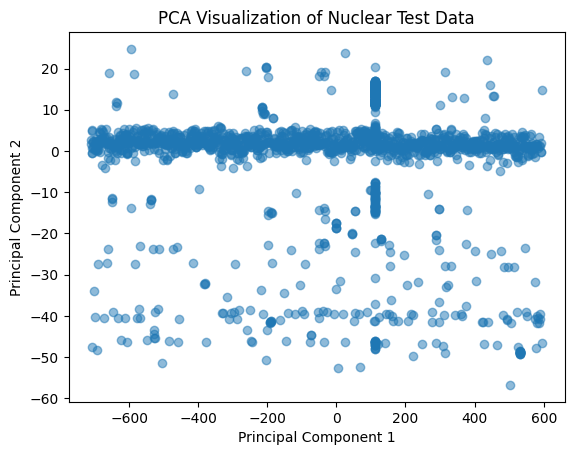

In [35]:
# PCA: Dimensionality reduction for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title("PCA Visualization of Nuclear Test Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
